In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 

In [2]:
hotelbookings = pd.read_csv('C:/Users/tejru/Downloads/hotel_bookings.csv')

In [3]:
hotelbookings.shape

(119390, 32)

In [4]:
hotelbookings.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

# Taking all the column names as a list

In [5]:
use_columns = list(hotelbookings.columns)

In [6]:
use_columns

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

# datatype of all columns

In [7]:
hotelbookings.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [8]:
display(hotelbookings.head())

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [9]:
hotelbookings.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [10]:
hotelbookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

# Filling all the null values in company & agent columns

In [11]:
hotelbookings['company'] = hotelbookings['company'].fillna('no company')
hotelbookings['agent'] = hotelbookings['agent'].fillna('no agent')

In [12]:
hotelbookings.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
company                             0
days_in_waiting_list                0
customer_typ

In [13]:
print(hotelbookings.company.unique().shape[0])
print(hotelbookings.agent.unique().shape[0])

353
334


# As there are many companies we are changing the company into 2 catagories 

In [14]:
hotelbookings.loc[hotelbookings['company'] != 'no company', 'company'] = 1
hotelbookings.loc[hotelbookings['company'] == 'no company', 'company'] = 0

In [15]:
hotelbookings.loc[hotelbookings['agent'] != 'no agent', 'agent'] = 1
hotelbookings.loc[hotelbookings['agent'] == 'no agent', 'agent'] = 0

# Changed all company & agent to two catagaries

In [16]:
print(hotelbookings.company.unique().shape[0])
print(hotelbookings.agent.unique().shape[0])

2
2


# Plotting of Target variable (is_canceled)

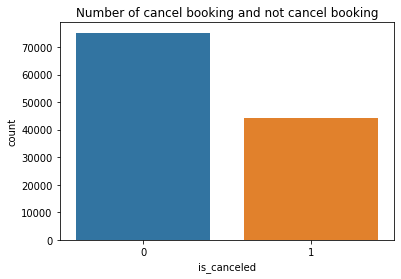

In [17]:
sns.countplot(hotelbookings['is_canceled'])
plt.title("Number of cancel booking and not cancel booking")
plt.show()


# Removing the dates columns which are not necessary for prediction

In [18]:
use_columns.remove('arrival_date_year')
use_columns.remove('arrival_date_month')
use_columns.remove('arrival_date_week_number')
use_columns.remove('arrival_date_day_of_month')

In [19]:
pd.DataFrame(hotelbookings.groupby(['is_canceled', 'hotel']).size())

0
is_canceled hotel              
0           City Hotel    46228
            Resort Hotel  28938
1           City Hotel    33102
            Resort Hotel  11122

# Observation:
Removing the hotelbookings column because of it has equal distribution of both cancel & not cancelled 

In [20]:
use_columns.remove('hotel')

In [21]:
hotelbookings.groupby(['assigned_room_type','is_canceled']).size()

assigned_room_type  is_canceled
A                   0              41105
                    1              32948
B                   0               1651
                    1                512
C                   0               1929
                    1                446
D                   0              18960
                    1               6362
E                   0               5838
                    1               1968
F                   0               2824
                    1                927
G                   0               1773
                    1                780
H                   0                461
                    1                251
I                   0                358
                    1                  5
K                   0                267
                    1                 12
L                   1                  1
P                   1                 12
dtype: int64

In [23]:
hotelbookings.groupby(['reserved_room_type','is_canceled']).size()

reserved_room_type  is_canceled
A                   0              52364
                    1              33630
B                   0                750
                    1                368
C                   0                624
                    1                308
D                   0              13099
                    1               6102
E                   0               4621
                    1               1914
F                   0               2017
                    1                880
G                   0               1331
                    1                763
H                   0                356
                    1                245
L                   0                  4
                    1                  2
P                   1                 12
dtype: int64

# Observation:
as we can see above the most of the 'A' hotel booking are getting cancelled which is biased, so when we use these above two variables our prediction will be biased. so removed these two columns

In [22]:
use_columns.remove('reserved_room_type')
use_columns.remove('assigned_room_type')

In [23]:
hotelbookings.groupby(['deposit_type','is_canceled']).size()

deposit_type  is_canceled
No Deposit    0              74947
              1              29694
Non Refund    0                 93
              1              14494
Refundable    0                126
              1                 36
dtype: int64

# Observstion:
deposit variable is quite useful,the chance of someone who did a deposit like Non Refund cancel a booking is huge

In [24]:
hotelbookings.groupby(['total_of_special_requests', 'is_canceled']).size()

total_of_special_requests  is_canceled
0                          0              36762
                           1              33556
1                          0              25908
                           1               7318
2                          0              10103
                           1               2866
3                          0               2051
                           1                446
4                          0                304
                           1                 36
5                          0                 38
                           1                  2
dtype: int64

# Observstion:
we can see that the number of requests does have influence on the cancelation rate.

In [25]:
hotelbookings.groupby(['is_canceled', 'required_car_parking_spaces']).size()

is_canceled  required_car_parking_spaces
0            0                              67750
             1                               7383
             2                                 28
             3                                  3
             8                                  2
1            0                              44224
dtype: int64

# Observation:
When a booking is created and the guest request at least one space, he is definily going to hotel

# removing the reservation status date & status as they won't be helpful in prediction of cancellation as they are reserved catagaory 

In [26]:
use_columns.remove('reservation_status_date')
use_columns.remove('reservation_status')

In [27]:
use_columns

['is_canceled',
 'lead_time',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [28]:
pd.DataFrame(use_columns).shape

(23, 1)

In [29]:
hotelbookings[use_columns].shape

(119390, 23)

In [30]:
hotelbookings.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
company                             0
days_in_waiting_list                0
customer_typ

In [31]:
hotelbookings = hotelbookings.dropna(axis=0)


In [32]:
hotelbookings.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

# Removing the  null values as they can't be imputated

In [33]:
hotelbookings.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

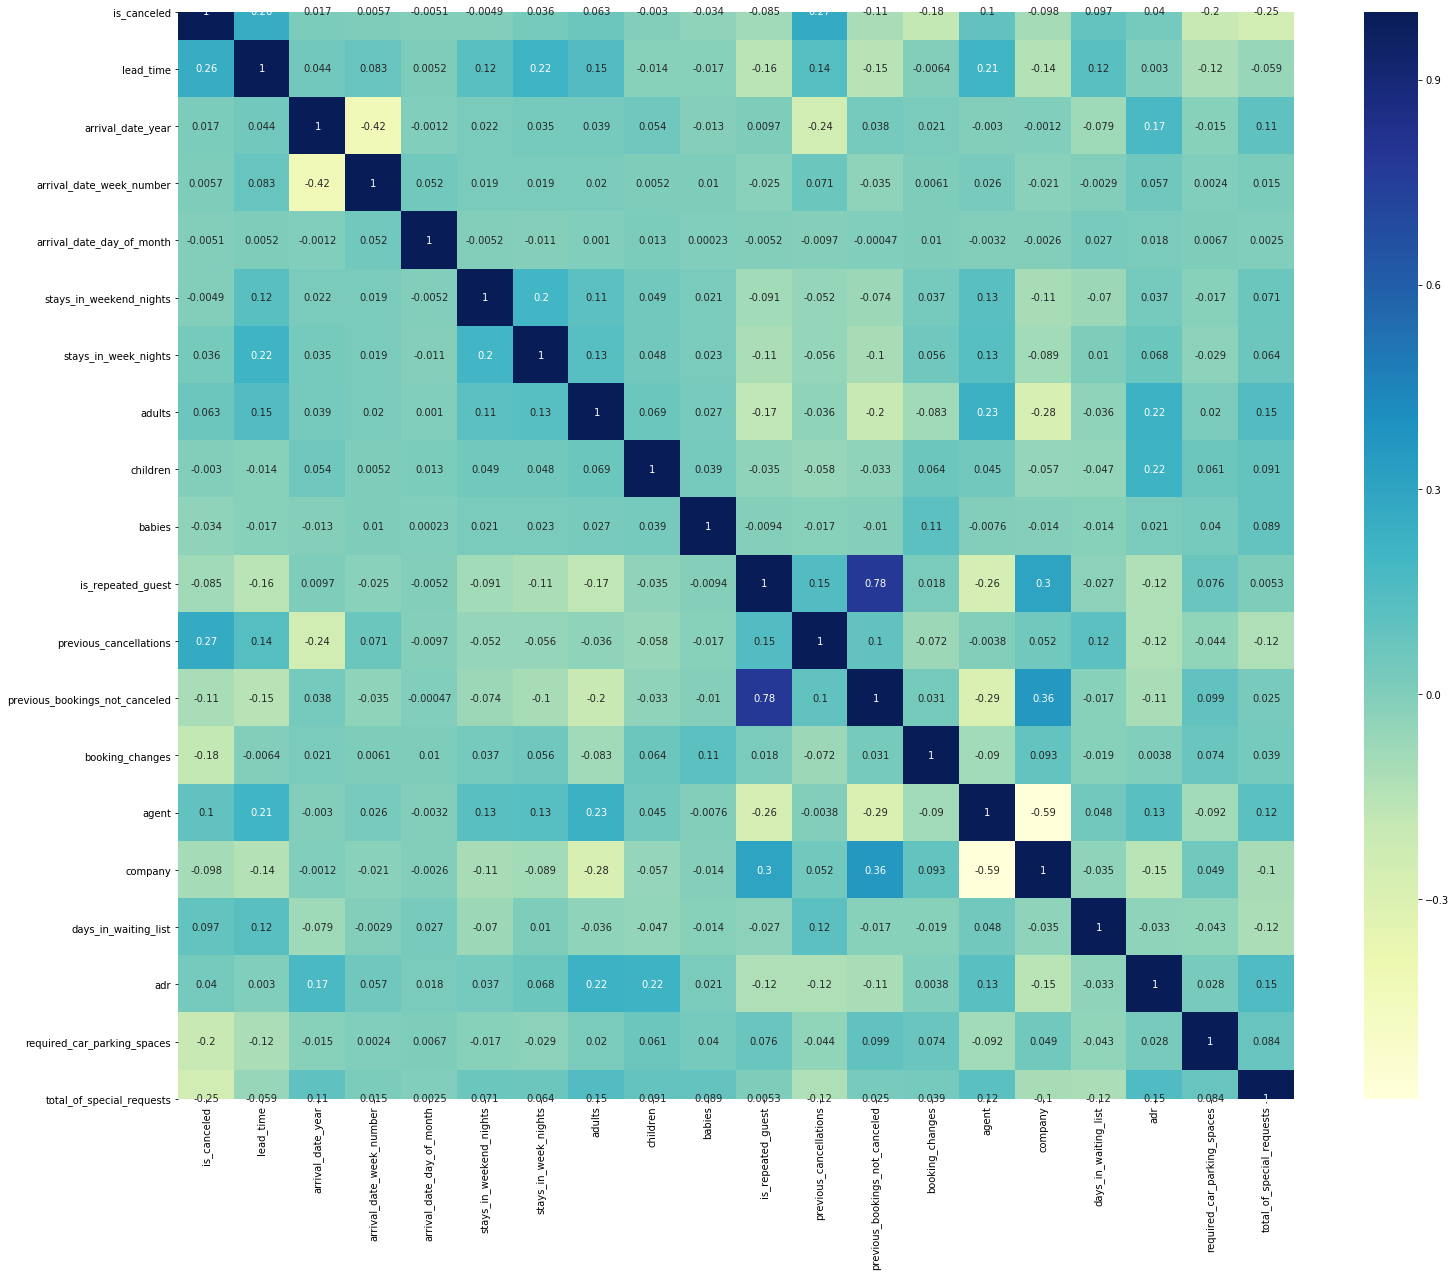

In [34]:
plt.figure(figsize=(25 ,20 ))
sns.heatmap(hotelbookings.corr(method='kendall'),cmap='YlGnBu', annot=True)

In [35]:
use_columns.remove('previous_bookings_not_canceled')
use_columns.remove('company')

# Converting the catagorical columns into continous numerical by using labelencoder

In [36]:
labelEncoder = LabelEncoder()
encoded_dataframe = hotelbookings[use_columns].apply(lambda x: labelEncoder.fit_transform(x.astype(str)))

In [37]:
encoded_dataframe.isnull().sum()

is_canceled                    0
lead_time                      0
stays_in_weekend_nights        0
stays_in_week_nights           0
adults                         0
children                       0
babies                         0
meal                           0
country                        0
market_segment                 0
distribution_channel           0
is_repeated_guest              0
previous_cancellations         0
booking_changes                0
deposit_type                   0
agent                          0
days_in_waiting_list           0
customer_type                  0
adr                            0
required_car_parking_spaces    0
total_of_special_requests      0
dtype: int64

In [38]:
encoded_dataframe.to_csv (r'C:\Users\tejru\Downloads\hotel_booking.csv', index = False, header=True)

In [39]:
encoded_dataframe.shape

(118898, 21)

# Spliting the dataset into train & test data

In [40]:
x_train, x_test, y_train, y_test = train_test_split(encoded_dataframe.drop('is_canceled', axis=1),
                                                    encoded_dataframe['is_canceled'])

# Logistic regression 

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
logit = LogisticRegression(fit_intercept=True, penalty='l2')
logit.fit(x_train, y_train)

C:\Users\tejru\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Confusion Matrix

In [42]:
logit_pred = logit.predict(x_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(logit_pred, name = 'Predict'), margins = True)


Predict,0,1,All
Actual,,,
0,3458,1142,4600
1,2064,707,2771
All,5522,1849,7371


In [50]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [51]:
lr_auc = roc_auc_score(y_test, logit_pred)

In [53]:
lr_fpr, lr_tpr, _ = roc_curve(y_test, logit_pred)

# Precision Recall Accuracy calculation using Logistic regression

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, logit_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, logit_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, logit_pred)))

Accuracy is 0.70
Precision is 0.65
Recall is 0.44


# Random Classifier

In [44]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [49]:
model_pred = model.predict(x_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(model_pred, name = 'Predict'), margins = True)


Predict,0,1,All
Actual,,,
0,3008,1592,4600
1,1836,935,2771
All,4844,2527,7371


In [45]:
y_pred = model.predict(x_test)

# Confusion matrix from random classifier

In [46]:
confusion_matrix(y_pred, y_test)

array([[17172,  2503],
       [ 1519,  8531]], dtype=int64)

In [47]:
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, y_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, y_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, y_pred)))

Accuracy is 0.86
Precision is 0.85
Recall is 0.77


# Important features

In [48]:
pd.DataFrame.from_dict([dict(zip(encoded_dataframe.drop('is_canceled', axis=1), model.feature_importances_))]).T.sort_values(0)

,0
babies,0.001181
days_in_waiting_list,0.003627
is_repeated_guest,0.004657
agent,0.006771
children,0.009906
distribution_channel,0.013760
meal,0.018372
adults,0.019500
booking_changes,0.022191
required_car_parking_spaces,0.026464
